In [2]:
# Due to IFrame incompatibility on GitHub, please view this notebook at this URL to view all plotly maps, which do not show below:
# https://nbviewer.jupyter.org/github/usmanakhter/cms_opioid/blob/master/opioid_prescribing.ipynb

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy

#plotly
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [3]:
#create opioid #dataframe from csv
opioid_df = pd.read_csv("opioid2016.csv")

#preview data
opioid_df.info()
opioid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131550 entries, 0 to 1131549
Data columns (total 11 columns):
NPI                                         1131550 non-null int64
NPPES Provider Last Name                    1131518 non-null object
NPPES Provider First Name                   1131518 non-null object
NPPES Provider ZIP Code                     1131497 non-null float64
NPPES Provider State                        1131550 non-null object
Specialty Description                       1131550 non-null object
Total Claim Count                           1131550 non-null int64
Opioid Claim Count                          812547 non-null float64
Opioid Prescribing Rate                     812547 non-null float64
Extended-Release Opioid Claims              1003036 non-null float64
Extended-Release Opioid Prescribing Rate    388564 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 95.0+ MB


,NPI,NPPES Provider ZIP Code,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Extended-Release Opioid Claims,Extended-Release Opioid Prescribing Rate
count,1.131550e+06,1.131497e+06,1.131550e+06,812547.000000,812547.000000,1.003036e+06,388564.000000
mean,1.499842e+09,4.806815e+04,1.308800e+03,96.173274,10.972242,5.367090e+00,2.668037
std,2.879109e+08,3.029548e+04,3.147395e+03,315.482373,17.424112,4.679540e+01,7.169746
min,1.003000e+09,0.000000e+00,1.100000e+01,0.000000,0.000000,0.000000e+00,0.000000
25%,1.245689e+09,2.120100e+04,5.400000e+01,0.000000,0.000000,0.000000e+00,0.000000
50%,1.497973e+09,4.503900e+04,2.000000e+02,19.000000,2.901024,0.000000e+00,0.000000
75%,1.740699e+09,7.657400e+04,1.000000e+03,69.000000,14.152168,0.000000e+00,0.000000
max,1.993000e+09,9.992900e+04,3.242090e+05,21772.000000,100.000000,5.548000e+03,100.000000


In [4]:
#clean up column titles
opioid_df.columns = opioid_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
opioid_df.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,extended-release_opioid_claims,extended-release_opioid_prescribing_rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.220183,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,1004.0,57.934218,63.0,6.2749
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,49,11.0,22.448980,0.0,0.0000
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,146,NaN,NaN,0.0,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2225,17.0,0.764045,0.0,0.0000


The dataset has about 1.1 million doctors, which a quick Google search confirms is the number of all doctors in America. Data is missing on opioid and extended-release opioid claims, because not all physicians prescribe opioids. Also, some 0s are NaNs are interchanged, which may explain why there is less data on extended-release prescribing rate than extended-release claims.

<h2> Who prescribes the most opioids? </h2>

In [6]:
opioid_df.sort_values(by='opioid_claim_count', ascending=False).head(10)

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,extended-release_opioid_claims,extended-release_opioid_prescribing_rate
363670,1326019712,MURPHY,MARK,35601.0,AL,Pain Management,32039,21772.0,67.954680,5548.0,25.482271
850551,1750347605,MURCIANO,ENRIQUE,33143.0,FL,Anesthesiology,30232,19563.0,64.709579,1453.0,7.427286
366525,1326092610,PATEL,ALPESH,70809.0,LA,Interventional Pain Management,28962,18502.0,63.883710,3840.0,20.754513
364323,1326035163,GARLAPATI,BUTCHAIAH,72117.0,AR,Physical Medicine and Rehabilitation,29059,17753.0,61.092949,3668.0,20.661297
690563,1619004744,MCGEE,DARIUS,39440.0,MS,Nurse Practitioner,27228,16456.0,60.437785,974.0,5.918814
48157,1043276488,CHAO,RAUL,33143.0,FL,Interventional Pain Management,23556,16045.0,68.114281,636.0,3.963852
805483,1710085196,LEDFORD,MELANIE,40353.0,KY,Physical Medicine and Rehabilitation,25693,15859.0,61.724983,1687.0,10.637493
1086409,1962405035,MARTUCCI,MARTIN,74104.0,OK,Pain Management,20052,15527.0,77.433672,3254.0,20.957043
401355,1356427850,KABAKIBOU,KAMAL,30327.0,GA,Pain Management,26989,15397.0,57.049168,3225.0,20.945639
81433,1073555397,REHEEM,MEDHAT,34613.0,FL,Interventional Pain Management,22086,15285.0,69.206737,3564.0,23.316977


<h4> What specialties prescribe the most opioids? </h4>

In [7]:
opioid_perspecialty_df=opioid_df.groupby('specialty_description').sum().sort_values(by='opioid_claim_count', ascending=False)
opioid_perspecialty_df.reset_index(inplace=True)
opioid_perspecialty_df=opioid_perspecialty_df[['specialty_description', 'total_claim_count', 'opioid_claim_count', 'extended-release_opioid_claims']]
opioid_perspecialty_df.head(30)

,specialty_description,total_claim_count,opioid_claim_count,extended-release_opioid_claims
0,Family Practice,416912571,19844664.0,1059291.0
1,Internal Medicine,428182824,16657519.0,806570.0
2,Nurse Practitioner,133112072,7720135.0,709203.0
3,Physician Assistant,64585470,5466469.0,473628.0
4,Physical Medicine and Rehabilitation,7468295,3184269.0,472751.0
5,Orthopedic Surgery,6990467,3076021.0,28488.0
6,Anesthesiology,5335093,2932914.0,476693.0
7,Interventional Pain Management,4239715,2443225.0,403887.0
8,Pain Management,4234163,2436217.0,397064.0
9,Emergency Medicine,16417587,2269138.0,31173.0


In [20]:
#pie chart of opioid claims by specialty
opioid_perspecialty_pie=opioid_perspecialty_df[:10]
pie = {
  "data": [
    {
      "values": opioid_perspecialty_pie['opioid_claim_count'],
      "labels": opioid_perspecialty_pie['specialty_description'],
      "domain": {"x": [0, .48]},
      "name": "Specialty",
      "hoverinfo":"label+value+name",
      "hole": .3,
      "type": "pie"
    },
],
  "layout": {
        "title":"Opioid Claims Prescribed by Specialty",
        "annotations": [
            {
                "font": {
                    "size": 16
                },
                "showarrow": False,
                "text": "Specialties",
                "x": 0.168,
                "y": 0.5
            }
        ]
    }
}
plotly.offline.iplot(pie)

Family and Internal lead opioid prescriptions. Surprisingly, Nurse Practitioners and PAs account for almost 20% of prescriptions, though these prescriptions were probably made with a team including other Family/Internal docs. 

<h4>Which states have the most opioid prescriptions?</h4>

In [9]:
#take top 5 states by opioid claim count
top_states_df=opioid_df.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False)[['total_claim_count', 'opioid_claim_count', 'extended-release_opioid_claims']]
top_states_df.reset_index(inplace=True)
top_5states_df=top_states_df[:5]
top_5states_df.head(10)


,nppes_provider_state,total_claim_count,opioid_claim_count,extended-release_opioid_claims
0,CA,138635091,6956583.0,530420.0
1,FL,107208736,5568389.0,477537.0
2,TX,91924608,5012297.0,236440.0
3,PA,75241541,3525981.0,253939.0
4,MI,49958016,3337506.0,234558.0


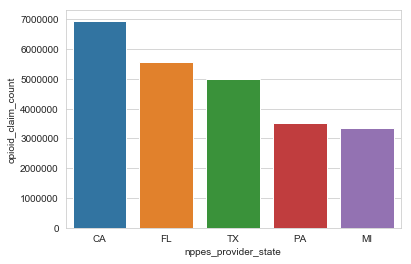

In [10]:
#graph opioid prescriptions by top states
sns.barplot(x="nppes_provider_state", y="opioid_claim_count", data=top_5states_df);

...California, Florida, Texas, Pennsylvania and Michigan

In [11]:
#map of top opioid-prescribing states
dropped3=opioid_df[['nppes_provider_state', 'opioid_claim_count']]
top_states_map_df=dropped3.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False)
top_states_map_df.reset_index(inplace=True)

In [12]:
trc=dict(
    type='choropleth',
    locations=top_states_map_df['nppes_provider_state'],
    locationmode='USA-states',
    colorscale=[[0, 'rgb(255, 255, 255)'], [0.5, 'rgb(255, 200, 200)'], [1.0, 'rgb(255, 0, 0)']], 
    z=top_states_map_df['opioid_claim_count'])
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)
plotly.offline.iplot(map)

This makes sense... CA, TX, FL make up the top 3 most populous states in America with PA and MI in the top 10. A more interesting statistic would be opioid per capita.

In [13]:
#create state populations dataframe from csv; data taken from https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
state_populations_df = pd.read_csv("state_populations.csv")

#rename state column to merge opioid_df w/ state_populations_df on common state column
state_populations_df.rename(columns={'state' : 'nppes_provider_state'}, inplace=True)

#preview
state_populations_df.head(10)

,nppes_provider_state,state_population,national_population_percent
0,CA,"39,536,653",12.14%
1,TX,"28,304,596",8.69%
2,FL,"20,984,400",6.44%
3,NY,"19,849,399",6.09%
4,PA,"12,805,537",3.93%
5,IL,"12,173,837",3.93%
6,OH,"11,658,609",3.58%
7,GA,"10,429,379",3.20%
8,NC,"10,273,419",3.15%
9,MI,"9,962,311",3.06%


In [14]:
#merge the opioid and state population datasets
opioid_withcapita_df=pd.merge(top_states_df, state_populations_df, how='left', on='nppes_provider_state')

#drop national_population_percent, convert state_population from object to float64
opioid_withcapita_df.drop(columns=['national_population_percent'], inplace=True)
opioid_withcapita_df['state_population'] = opioid_withcapita_df['state_population'].str.replace(',', '')
opioid_withcapita_df['state_population'] = pd.to_numeric(opioid_withcapita_df['state_population'])

#create opioid_per_capita column (opioid claims / state population)
opioid_withcapita_df['opioid_claim_per_capita'] = opioid_withcapita_df['opioid_claim_count']/opioid_withcapita_df['state_population']

#group data by opioid_claim_per_capita
opioid_percapita_df=opioid_withcapita_df.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_per_capita', ascending=False)
opioid_percapita_df.reset_index(inplace=True)

#preview merged dataset
opioid_percapita_df.head(10)


,nppes_provider_state,total_claim_count,opioid_claim_count,extended-release_opioid_claims,state_population,opioid_claim_per_capita
0,AL,28882148,2156504.0,120579.0,4874747.0,0.442383
1,TN,41292770,2877947.0,245536.0,6715984.0,0.428522
2,AR,18139502,1155171.0,65819.0,3004279.0,0.384509
3,KY,30898947,1697521.0,76244.0,4454189.0,0.381107
4,WV,13006175,685130.0,28485.0,1815857.0,0.377304
5,MS,18350416,1094382.0,46299.0,2984100.0,0.366738
6,MI,49958016,3337506.0,234558.0,9962311.0,0.335013
7,OK,17701374,1294698.0,97209.0,3930864.0,0.329367
8,MO,36319542,2008383.0,115326.0,6113532.0,0.328514
9,LA,26556445,1535068.0,77366.0,4684333.0,0.327703


The presence of these southern/Applachian states comprising the top 10 aligns more with the opioid epidemic narrative.

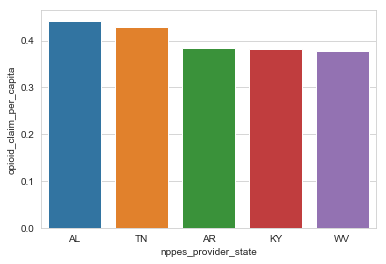

In [15]:
opioid_percapita_5=opioid_percapita_df[:5]

#plot top 5 opioid per capita states
sns.barplot(x="nppes_provider_state", y="opioid_claim_per_capita", data=opioid_percapita_5);

In [22]:
#map of top opioid per capita states
trc=dict(
    type='choropleth',
    locations=opioid_percapita_df['nppes_provider_state'],
    locationmode='USA-states',
    colorscale=[[0, 'rgb(255, 255, 255)'], [0.5, 'rgb(153, 204, 255)'], [1.0, 'rgb(0, 0, 102)']], 
    z=opioid_percapita_df['opioid_claim_per_capita'])
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)
plotly.offline.iplot(map)


California and Texas become relatively low in opioid claims after accounting for per capita. The southern and Applachian states experience highest opioid claims per capita. This corroborates the opioid epidemic narrative.